# Generate GlacierMIP3 netcdf files for submission 

## Introduction 

## File naming convention 

`{contributor}_{rgi-region}_{aggregation-level}_{period}_{gcm}_{ssp}.nc`

All characters should be **lower case**, excepted the `{contributor}` entry for which you can choose the case. Underscores are forbidden in all brackets entries `{}` to avoid confusion.
- {contributor}: model or contributor name, in case more than one model configuration make it explicit (e.g. `OGGM-dyn`, `OGGM-vas`)
- {rgi-region}: for example `rgi09`
- {aggregation-level}: either `sum` (regional totals) or `glaciers` (individual glaciers)
- {period}: shuffled reference period (example: `1901-1920`)
- {gcm}: name of used gcm
- {ssp}: name of used ssp or `hist`

**Examples**:
- `Zekollari_rgi08_sum_2061-2080_ipsl-cm6a-lr_ssp585.nc`
- `OGGM-dyn_rgi11_glaciers_1901-1920_ipsl-cm6a-lr_hist.nc`

## File format 

[Netcdf](https://www.unidata.ucar.edu/software/netcdf/) files are very common in the Earth Sciences, and should be writable by any scientific programming language. Here we shortly describe the format of the file followed by a code sample in python and in MATLAB.

In [1]:
import os
from datetime import date
import numpy as np
import xarray as xr

### Regional sums

In [2]:
filename = 'Zekollari_rgi08_sum_2061-2080_ipsl-cm6a-lr_ssp585.nc'
with xr.open_dataset(os.path.join('templates', filename)) as ds:
    ds = ds.load()
ds.info()

xarray.Dataset {
dimensions:
	simulation_year = 1001 ;

variables:
	int16 simulation_year(simulation_year) ;
	float32 volume_m3(simulation_year) ;
		volume_m3:units = m3 ;
		volume_m3:long_name = Regional glacier volume at timestamp ;
	float32 area_m2(simulation_year) ;
		area_m2:units = m2 ;
		area_m2:long_name = Regional glacier area at timestamp ;

// global attributes:
	:contributor = Zekollari ;
	:contributor_email = bli.bla@blo.be ;
	:creation_date = 21/06/2021 ;
	:rgi-region = rgi08 ;
	:aggregation-level = sum ;
	:period = 2061-2080 ;
	:gcm = ipsl-cm6a-lr ;
	:ssp = ssp585 ;
	:information = Anything you find useful here ;
}

### Glacier per glacier

In [3]:
filename = 'OGGM-dyn_rgi11_glaciers_1901-1920_ipsl-cm6a-lr_hist.nc'
with xr.open_dataset(os.path.join('templates', filename)) as ds:
    ds = ds.load()
ds.info()

xarray.Dataset {
dimensions:
	rgi_id = 3 ;
	simulation_year = 1001 ;

variables:
	int16 simulation_year(simulation_year) ;
	object rgi_id(rgi_id) ;
	float32 volume_m3(simulation_year, rgi_id) ;
		volume_m3:units = m3 ;
		volume_m3:long_name = Regional glacier volume at timestamp ;
	float32 area_m2(simulation_year, rgi_id) ;
		area_m2:units = m2 ;
		area_m2:long_name = Regional glacier area at timestamp ;

// global attributes:
	:contributor = OGGM-dyn ;
	:contributor_email = bli.bla@blo.be ;
	:creation_date = 21/06/2021 ;
	:rgi-region = rgi11 ;
	:aggregation-level = glaciers ;
	:period = 1901-1920 ;
	:gcm = ipsl-cm6a-lr ;
	:ssp = hist ;
	:information = Anything you find useful here ;
}

## Writing GlacierMIP3 NetCDF files with python and xarray

Prerequisite: you need to have the [netcdf4-python](http://unidata.github.io/netcdf4-python/) and [xarray](http://xarray.pydata.org) packagea installed for this to work.

### Regional sums 

We create the `Zekollari_rgi08_sum_2061-2080_ipsl-cm6a-lr_ssp585.nc` file:

In [4]:
# Run info
contributor = 'Zekollari'
rgi_reg = 'rgi08'
agg_level = 'sum'
period = '2061-2080'
gcm = 'ipsl-cm6a-lr'
ssp = 'ssp585'

In [5]:
filename = f'{contributor}_{rgi_reg}_{agg_level}_{period}_{gcm}_{ssp}.nc'
filename

'Zekollari_rgi08_sum_2061-2080_ipsl-cm6a-lr_ssp585.nc'

In [6]:
# Fake data and time arrays
time = np.arange(1001)
volume = 1 / np.linspace(0.1, 1, 1001)**2
area = 1 / np.linspace(0.1, 1, 1001)

In [7]:
ds = xr.Dataset()

ds.attrs['contributor'] = contributor
ds.attrs['contributor_email'] = 'bli.bla@blo.be'
ds.attrs['creation_date'] = date.today().strftime("%d/%m/%Y")
ds.attrs['rgi-region'] = rgi_reg
ds.attrs['aggregation-level'] = agg_level
ds.attrs['period'] = period
ds.attrs['gcm'] = gcm
ds.attrs['ssp'] = ssp
ds.attrs['information'] = 'Anything you find useful here'

ds['simulation_year'] = (('simulation_year'), time)

varname = 'volume_m3'
ds[varname] = (('simulation_year'), volume)
ds[varname].attrs['units'] = 'm3'
ds[varname].attrs['long_name'] = 'Regional glacier volume at timestamp'

varname = 'area_m2'
ds[varname] = (('simulation_year'), area)
ds[varname].attrs['units'] = 'm2'
ds[varname].attrs['long_name'] = 'Regional glacier area at timestamp'

# This is the same for all files
encoding = {
    'simulation_year': {"dtype": "int16"},
    'volume_m3': {"dtype": "float32"},
    'area_m2': {"dtype": "float32"},
}

ds.to_netcdf(os.path.join('templates', filename), encoding=encoding)

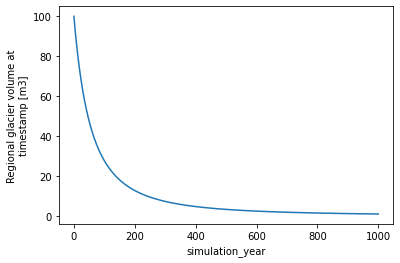

In [8]:
ds.volume_m3.plot();

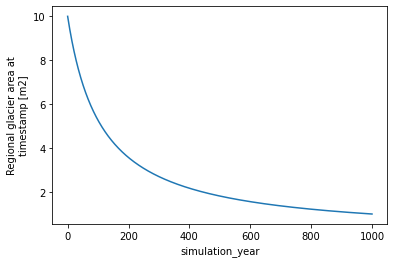

In [9]:
ds.area_m2.plot();

### Glacier per glacier

This is very similar, but with one more dimension.

We create the `OGGM-dyn_rgi11_glaciers_1901-1920_ipsl-cm6a-lr_hist.nc` file:

In [10]:
# Run info
contributor = 'OGGM-dyn'
rgi_reg = 'rgi11'
agg_level = 'glaciers'
period = '1901-1920'
gcm = 'ipsl-cm6a-lr'
ssp = 'hist'

In [11]:
filename = f'{contributor}_{rgi_reg}_{agg_level}_{period}_{gcm}_{ssp}.nc'
filename

'OGGM-dyn_rgi11_glaciers_1901-1920_ipsl-cm6a-lr_hist.nc'

In [12]:
# Fake data and time arrays
time = np.arange(1001)
volume = np.array([1 / np.linspace(0.1, 1, 1001)**x for x in [2, 3, 4]]).T
area = np.sqrt(volume) 
rgi_id = ['RGI60-11.00897', 'RGI60-11.00898', 'RGI60-11.00899']

In [13]:
ds = xr.Dataset()

ds.attrs['contributor'] = contributor
ds.attrs['contributor_email'] = 'bli.bla@blo.be'
ds.attrs['creation_date'] = date.today().strftime("%d/%m/%Y")
ds.attrs['rgi-region'] = rgi_reg
ds.attrs['aggregation-level'] = agg_level
ds.attrs['period'] = period
ds.attrs['gcm'] = gcm
ds.attrs['ssp'] = ssp
ds.attrs['information'] = 'Anything you find useful here'

ds['simulation_year'] = (('simulation_year'), time)
ds['rgi_id'] = (('rgi_id'), rgi_id)

varname = 'volume_m3'
ds[varname] = (('simulation_year', 'rgi_id'), volume)
ds[varname].attrs['units'] = 'm3'
ds[varname].attrs['long_name'] = 'Regional glacier volume at timestamp'

varname = 'area_m2'
ds[varname] = (('simulation_year', 'rgi_id'), area)
ds[varname].attrs['units'] = 'm2'
ds[varname].attrs['long_name'] = 'Regional glacier area at timestamp'

# This is the same for all files
encoding = {
    'simulation_year': {"dtype": "int16"},
    'volume_m3': {"dtype": "float32"},
    'area_m2': {"dtype": "float32"},
}

ds.to_netcdf(os.path.join('templates', filename), encoding=encoding)

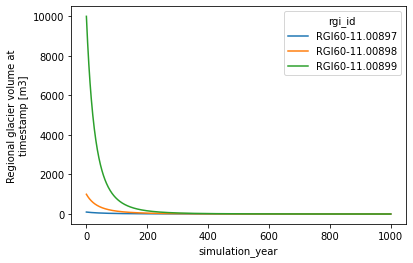

In [14]:
ds.volume_m3.plot(hue='rgi_id');

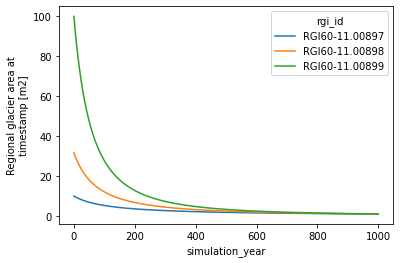

In [15]:
ds.area_m2.plot(hue='rgi_id');

## Writing GlacierMIP3 NetCDF files with MATLAB

TODO 